In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
BASE_DIR ='Vegetable Images/'

Found 15000 images belonging to 15 classes.
(32, 32, 3)


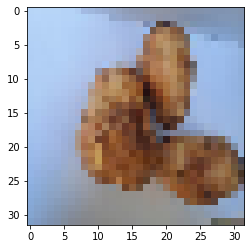

In [3]:
#/225로 정규화 처리 후 이미지 불러오기
train_datagen = ImageDataGenerator(rescale=1./255) 

#LeNet-5 이미지 사이즈에 맞춰 32*32로 이미지 불러오기
train_datagen_flow = train_datagen.flow_from_directory(BASE_DIR + 'train', target_size=(32,32), seed=42, class_mode='categorical') 

x_train, y_train = train_datagen_flow.next()

print(x_train[0].shape)
plt.imshow(x_train[0])
plt.show()

In [4]:
class_map = dict([(v,k) for k,v in train_datagen_flow.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


Found 3000 images belonging to 15 classes.
(32, 32, 3)


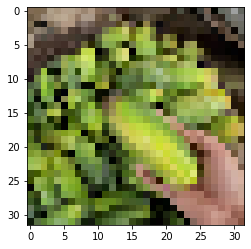

In [5]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + 'validation', target_size=(32,32),seed=42, class_mode='categorical')

x_valid,y_valid = valid_datagen_flow.next()

print(x_valid[0].shape)
plt.imshow(x_valid[0])
plt.show()

Found 3000 images belonging to 15 classes.
(32, 32, 3)


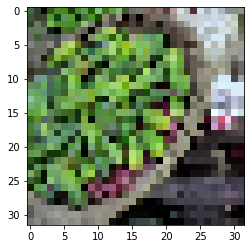

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen_flow = test_datagen.flow_from_directory(BASE_DIR + 'test', target_size=(32,32),seed=42, class_mode='categorical')

x_test,y_test = test_datagen_flow.next()

print(x_test[0].shape)
plt.imshow(x_test[0])
plt.show()

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (32, 32, 32, 3)
32 train samples
32 test samples
(32, 32, 3) image shape


In [8]:
call_back = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
input_shape = x_train[0].shape

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Flatten(),
    
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='softmax')

])

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [13]:
history = model.fit(x_train, y=y_train, 
          epochs=50, 
          batch_size = 32,
          validation_data=(x_valid, y_valid), 
            callbacks = call_back,
          verbose=1)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 4.0045 - accuracy: 0.0625 - val_loss: 2.7449 - val_accuracy: 0.0312
Epoch 2/50
1/1 [==============================] - 1s 898ms/step - loss: 5.1151 - accuracy: 0.2500 - val_loss: 2.7391 - val_accuracy: 0.0938
Epoch 3/50
1/1 [==============================] - 1s 924ms/step - loss: 12.1919 - accuracy: 0.2188 - val_loss: 2.8252 - val_accuracy: 0.1250
Epoch 4/50
1/1 [==============================] - 1s 905ms/step - loss: 10.2891 - accuracy: 0.3125 - val_loss: 2.9010 - val_accuracy: 0.0312
Epoch 5/50
1/1 [==============================] - 1s 916ms/step - loss: 7.1565 - accuracy: 0.3750 - val_loss: 2.9122 - val_accuracy: 0.0938
Epoch 6/50
1/1 [==============================] - 1s 882ms/step - loss: 2.9052 - accuracy: 0.4062 - val_loss: 2.9409 - val_accuracy: 0.0625
Epoch 7/50
1/1 [==============================] - 1s 907ms/step - loss: 1.8116 - accuracy: 0.6250 - val_loss: 3.0205 - val_accuracy: 0.0312
Restoring model weigh

In [14]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

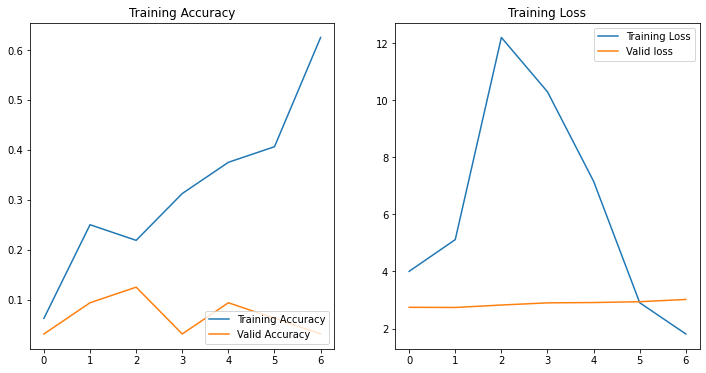

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Valid Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Valid loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [16]:
test_score = model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 189ms/step - loss: 2.7082 - accuracy: 0.0625


In [17]:
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

Test loss 2.7082, accuracy 6.25%


이미지 크기 32 * 32는 성능이 좋지 않음 